<a href="https://colab.research.google.com/github/Harold-Rodriguez/ECG/blob/main/Project_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Dec  8 14:33:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_data = '/content/drive/MyDrive/11_MAS2/ECG/data'

y = pd.read_csv(f'{path_data}/annotations/gold_standard.csv')
y.rename(columns={'1dAVb': 'dAVb'}, inplace=True)
with h5py.File(f"{path_data}/ecg_tracings.hdf5", "r") as f:
  x = np.array(f['tracings'])
np.random.seed(123)

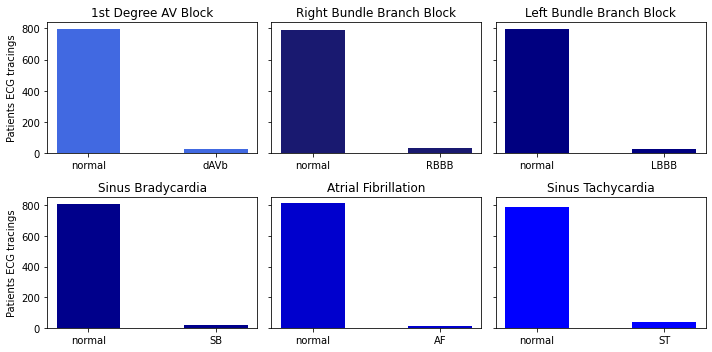

In [ ]:
n_bins = 200
labels= ['normal']
labels.extend(y.columns)
label = 3
axes=np.array([2, 3])
colors=['royalblue', 'midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue']
titles = ['1st Degree AV Block', 'Right Bundle Branch Block', 'Left Bundle Branch Block', 'Sinus Bradycardia', 'Atrial Fibrillation', 'Sinus Tachycardia']
fig, axs = plt.subplots(2, 3, figsize=(10,5), tight_layout=True, sharey='row')
axs[0, 0].set_ylabel('Patients ECG tracings')
axs[1, 0].set_ylabel('Patients ECG tracings') 
for i in range(axes[0]) :
  label*=i
  for n in range(axes[1]):
    axs[i, n].bar((labels[0], labels[label+1]), y[labels[label+1]].value_counts(), width=0.5, color = colors[label])
    axs[i, n].set_title(titles[label])
    label+=1

In [ ]:
x_flatten=x.reshape(827,12*4096)
X_Train_Nor, X_Test_Nor, Y_Train_Nor, Y_Test_Nor = train_test_split(x_flatten[np.where(y['dAVb']==0)], y.dAVb[y['dAVb']==0], test_size=0.20, random_state=1)
X_Train_dAVb, X_Test_dAVb, Y_Train_dAVb, Y_Test_dAVb = train_test_split(x_flatten[np.where(y['dAVb']==1)], y.dAVb[y['dAVb']==1], test_size=0.20, random_state=1)
X_Train_RBBB, X_Test_RBBB, Y_Train_RBBB, Y_Test_RBBB = train_test_split(x_flatten[np.where(y['RBBB']==1)], y.RBBB[y['RBBB']==1], test_size=0.20, random_state=1)
X_Train_LBBB, X_Test_LBBB, Y_Train_LBBB, Y_Test_LBBB = train_test_split(x_flatten[np.where(y['LBBB']==1)], y.LBBB[y['LBBB']==1], test_size=0.20, random_state=1)
X_Train_SB, X_Test_SB, Y_Train_SB, Y_Test_SB = train_test_split(x_flatten[np.where(y['SB']==1)], y.SB[y['SB']==1], test_size=0.20, random_state=1)
X_Train_AF, X_Test_AF, Y_Train_AF, Y_Test_AF = train_test_split(x_flatten[np.where(y['AF']==1)], y.AF[y['AF']==1], test_size=0.20, random_state=1)
X_Train_ST, X_Test_ST, Y_Train_ST, Y_Test_ST = train_test_split(x_flatten[np.where(y['ST']==1)], y.ST[y['ST']==1], test_size=0.20, random_state=1)

In [ ]:
# I´m going to try another way
'''N = 49152
f_s = 200
t_n = 2.56
T = t_n / N
amplitudes = X_Train
x_value = np.linspace(0,t_n,N)
frequencies = [17, 15.5, 14, 12.5, 11, 9.5, 8, 6.5, 5, 3, 1.5, 1]
frequencies = np.tile(frequencies, len(amplitudes))
y_values = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)'''

'N = 49152\nf_s = 200\nt_n = 2.56\nT = t_n / N\namplitudes = X_Train\nx_value = np.linspace(0,t_n,N)\nfrequencies = [17, 15.5, 14, 12.5, 11, 9.5, 8, 6.5, 5, 3, 1.5, 1]\nfrequencies = np.tile(frequencies, len(amplitudes))\ny_values = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]\ncomposite_y_value = np.sum(y_values, axis=0)'

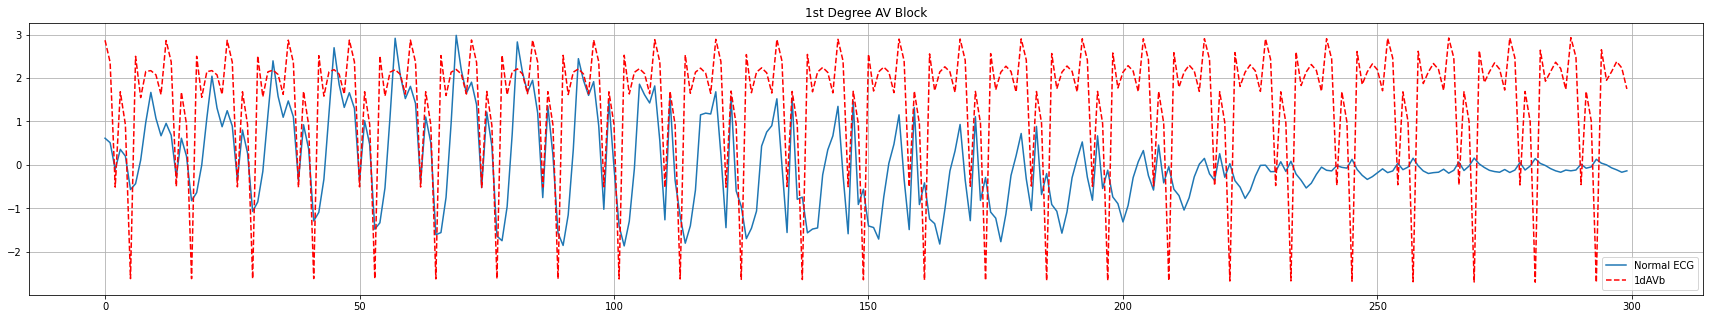

In [ ]:
plt.figure(figsize=(30, 5))
plt.grid()
plt.plot(np.arange(300), X_Test_Nor[0][10800:11100], label='Normal ECG')
plt.plot(np.arange(300), X_Test_dAVb[0][10800:11100], 'r--', label='1dAVb')
plt.title('1st Degree AV Block')
plt.legend()

Il faut corriger des amplitudes pour les avoir toues dans la meme scale 

In [ ]:
# Unify amplitudes to normalize data
min_max_scaler = MinMaxScaler()
X_Train_Nor_s = min_max_scaler.fit_transform(X_Train_Nor)
print('Original Min and Max: {:.1f}, {:.1f}'.format(np.min(X_Train_Nor), np.max(X_Train_Nor)))
print('Original Min and Max: {:.1f}, {:.1f}'.format(np.min(X_Train_Nor_s), np.max(X_Train_Nor_s)))

X_Test_Nor_s = min_max_scaler.transform(X_Test_Nor)
X_Test_dAVb_s = min_max_scaler.transform(X_Test_dAVb)
X_Test_RBBB_s = min_max_scaler.transform(X_Test_RBBB)
X_Test_LBBB_s = min_max_scaler.transform(X_Test_LBBB)
X_Test_SB_s = min_max_scaler.transform(X_Test_SB)
X_Test_AF_s = min_max_scaler.transform(X_Test_AF)
X_Test_ST_s = min_max_scaler.transform(X_Test_ST)

Original Min and Max: -27.8, 56.4
Original Min and Max: 0.0, 1.0


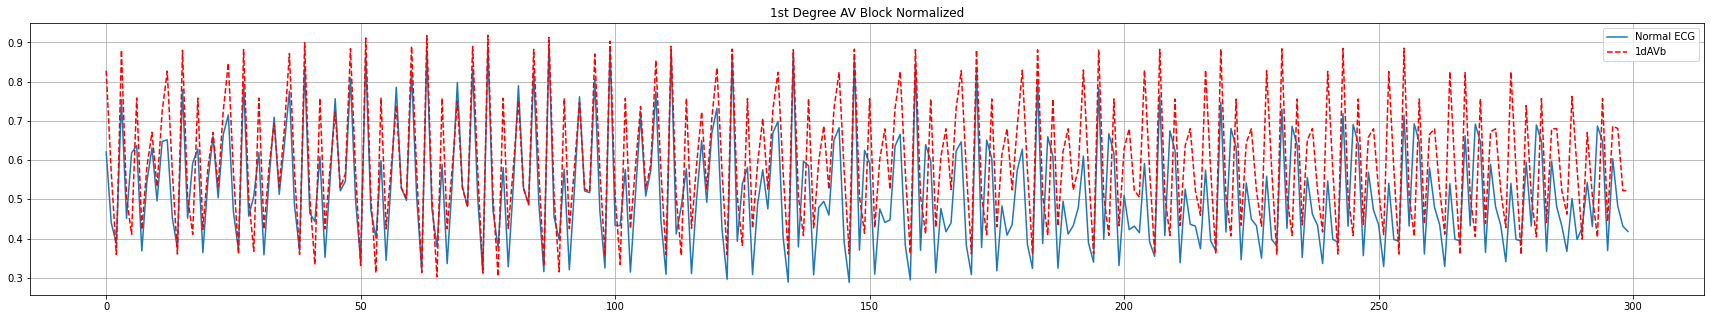

In [ ]:
plt.figure(figsize=(30, 5))
plt.grid()
plt.plot(np.arange(300), X_Test_Nor_s[0][10800:11100], label='Normal ECG')
plt.plot(np.arange(300), X_Test_dAVb_s[0][10800:11100], 'r--', label='1dAVb')
plt.title('1st Degree AV Block Normalized')
plt.legend()

In [ ]:
entry_dim = X_Train_Nor_s.shape[1]
entry = Input(shape=(entry_dim,))

#Encoder
encoder = Dense(1000, activation = 'relu')(entry)
encoder = Dense(300, activation = 'relu')(encoder)
encoder = Dense(50, activation = 'relu')(encoder)

#Decoder
decoder = Dense(300, activation='relu')(encoder)
decoder = Dense(1000, activation='relu')(decoder)
decoder = Dense(49152, activation='sigmoid')(decoder)

#Autoencoder = entrada + decoder 
autoencoder = Model(inputs=entry, outputs=decoder)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 49152)]           0         
                                                                 
 dense_6 (Dense)             (None, 1000)              49153000  
                                                                 
 dense_7 (Dense)             (None, 300)               300300    
                                                                 
 dense_8 (Dense)             (None, 50)                15050     
                                                                 
 dense_9 (Dense)             (None, 300)               15300     
                                                                 
 dense_10 (Dense)            (None, 1000)              301000    
                                                                 
 dense_11 (Dense)            (None, 49152)             4920

In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')
history = autoencoder.fit(X_Train_Nor_s, X_Train_Nor_s, 
                          epochs=20, 
                          batch_size=512, 
                          validation_data = (X_Test_Nor_s, X_Test_Nor_s), 
                          shuffle=True)

Epoch 1/20
2/2 [==============================] - 3s 429ms/step - loss: 0.1151 - val_loss: 0.0999
Epoch 2/20
2/2 [==============================] - 0s 183ms/step - loss: 0.0918 - val_loss: 0.1310
Epoch 3/20
2/2 [==============================] - 0s 169ms/step - loss: 0.1126 - val_loss: 0.0826
Epoch 4/20
2/2 [==============================] - 0s 170ms/step - loss: 0.0776 - val_loss: 0.0537
Epoch 5/20
2/2 [==============================] - 0s 168ms/step - loss: 0.0476 - val_loss: 0.0508
Epoch 6/20
2/2 [==============================] - 0s 168ms/step - loss: 0.0459 - val_loss: 0.0470
Epoch 7/20
2/2 [==============================] - 0s 171ms/step - loss: 0.0419 - val_loss: 0.0446
Epoch 8/20
2/2 [==============================] - 0s 165ms/step - loss: 0.0389 - val_loss: 0.0396
Epoch 9/20
2/2 [==============================] - 0s 174ms/step - loss: 0.0339 - val_loss: 0.0393
Epoch 10/20
2/2 [==============================] - 0s 168ms/step - loss: 0.0342 - val_loss: 0.0402
Epoch 11/20
2/2 [==

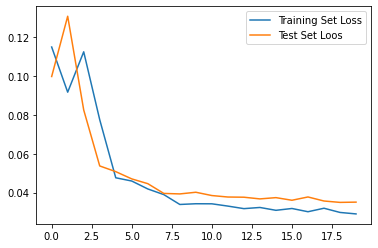

In [ ]:
plt.plot(history.history['loss'], label = 'Training Set Loss')
plt.plot(history.history['val_loss'], label = 'Test Set Loos')
plt.legend()